In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12,6)

# Assumptions of Linear Regression

## Short recap: What is Linear Regression

"It describes a relationship between two or more variables that finds a line through the data that minimizes squared errors."

Linear regression means that we model an output variable y as a linear combination of input variables X.

$\hat{y} = X\hat{w}$ or

$\hat{y} = \hat{w_0} + \hat{w_1} * x_1 + \hat{w_2} * x_2 + ... + \hat{w_n} * x_n$

where

- X ($x_1, x_2, x_3, ..., x_n$) are the input features, e.g. temperature, windspeed, hour of the day, ...
- $\hat{y}$ is our prediction for the outcome value (cnt; count of rentals)
- $\hat{w}$ $(w_0, w_1, ..., w_n)$ are the estimated coefficients for our input features
- $\epsilon$ is an error term (some unexplainable randomness)

In [75]:
# Show example

## Example
Let's consider the easy case where we only have one input variable.<br>
We want to predict the annual sallary in USD using the years of education as input feature. That means

**y = annual sallary in USD**<br>
**x = years of education**

With the relationship

$annual\_sallary = w_0 + w_1 * years\_of\_education + \epsilon$

Which assumptions do we need to make in order for our model to work?

# Assumptions

## A1) The true relationship between X and y is linear in the parameters

The dependent variable, y, is related to the independent variable(s), x, and the error, $\epsilon$ as 

$y = w_0 + w_1 * x + \epsilon$

$annual\_sallary = w_0 + w_1 * years\_of\_education + \epsilon$

## A2) The sample is a random sample

"A sample is part (or an extraction) of the population."

Otherwise the information gained is not representative for the whole population and the model **fails to generalize**.

## A3) There is variation in the X variables

The X variable(s) take(s) on different values. Otherwise no information can be gained by looking at X.

## A4) The mean of the error term $\epsilon$ conditional on X is 0

There is no relationship between X and the error term $\epsilon$.

$E(\epsilon|X) = 0$

# Unbiasedness

Under the assumptions A1 - A4 the linear regression estimator is **unbiased**.<br>
Unbiasedness refers to unbiasednes of the coefficients. It means that the expected value of the coefficient equals its true value:

$E(\hat{w}|X)=w$

Why do we care about that? If the estimate for $w$ is unbiased, the predictions for y become unbiased.

$E(y|X)=E(Xw + \epsilon|X)=Xw$

$E(\hat{y}|X)=E(X\hat{w}|X)=Xw$

$E(\hat{y}|X)=E(y|X)$

This means **under assumptions A1 - A4 in expectation we predict the right value!**

# Create some data for our model

In [7]:
sample_size = 2000
# create an array of years of education with a minimum value of 9 and a maximum value of 25 years
years_of_education = np.random.randint(9*10,25*10,size=sample_size)/10 #randint can only create integers

In [17]:
# Let's calculate the annual salary

# Define the true weights

# w_0 is the annual salary of a person without any education
w_0 = 20_000

# w_1: If the years of education increase by one the annual salary increases in expectation by w_1
w_1 = 1_000

# create a random error(as array)
error = 5_000 * np.random.randn(sample_size)

# calculate our annual salary according to the true relationship
annual_salary = w_0 + w_1 * years_of_education + error

In [18]:
# combine eerything into one dataframe
df = pd.DataFrame({'salary': annual_salary, 'education':years_of_education})
df.head()

,salary,education
0,31863.903554,20.8
1,38846.873306,23.2
2,47749.014000,17.4
3,41031.492403,23.6
4,34158.545083,9.7


In [19]:
df.shape

(2000, 2)

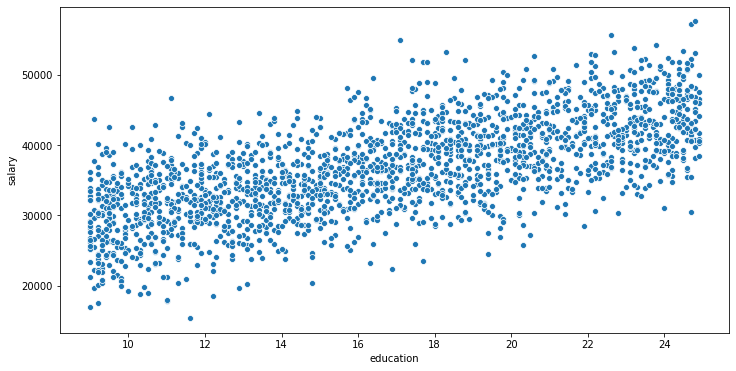

In [20]:
# Plot this

sns.scatterplot(x='education', y='salary', data=df)

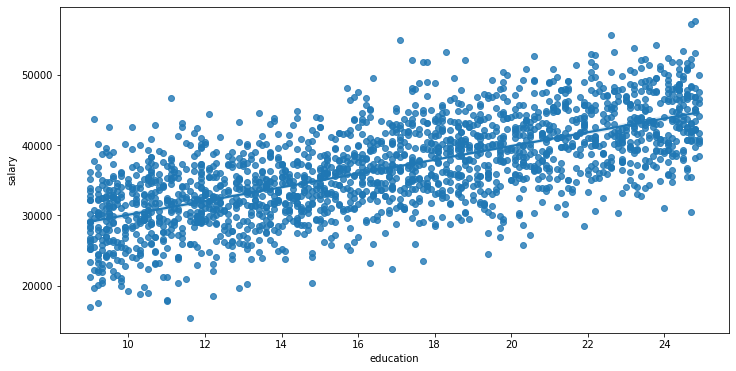

In [23]:
sns.regplot(x='education', y='salary', data=df)

#### Let's fit a model

In [24]:
# Option 1 - sklearn
from sklearn.linear_model import LinearRegression

In [25]:
# Instantiate the model
m = LinearRegression()

# fit the model
m.fit(df[['education']], df[['salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Make predictions and save them into the dataframe

df['ypred'] = m.predict(df[['education']])
df.head()

,salary,education,ypred
0,31863.903554,20.8,40637.914599
1,38846.873306,23.2,42980.178754
2,47749.014000,17.4,37319.707045
3,41031.492403,23.6,43370.556114
4,34158.545083,9.7,29804.942879


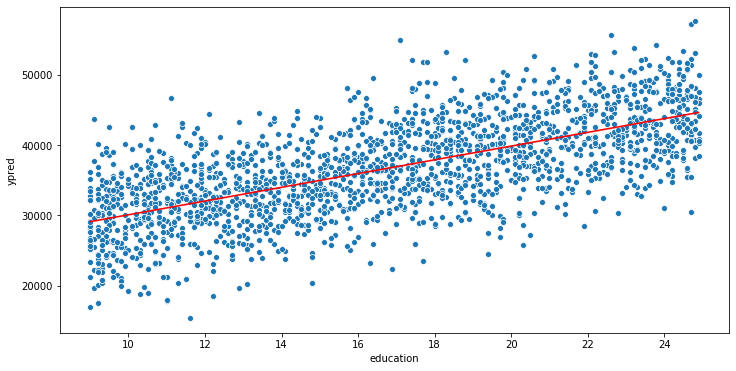

In [27]:
# Plot predicted and real data
sns.scatterplot(x='education', y='salary', data=df)
sns.lineplot(x='education', y='ypred', data=df, color='r')

In [28]:
# Option 2 - statsmodels

from statsmodels.regression.linear_model import OLS

In [32]:
df['intercept'] = 1 # statsmodels does not automatically include the intercept. so w_0 * 1 must be fitted

In [33]:
m_sm = OLS(df[['salary']], df[['education', 'intercept']]) # here, parameters for the fit are given during instantiating the model

In [34]:
result_sm = m_sm.fit() # no arguments needed for fit

In [37]:
result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     1679.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):          6.07e-267
Time:                        10:30:35   Log-Likelihood:                -19873.
No. Observations:                2000   AIC:                         3.975e+04
Df Residuals:                    1998   BIC:                         3.976e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
education    975.9434     23.817     40.976      0.000     929.234    1022.653
intercept   2.034e+04    414.621     49.053      0.000    1.95e+04    2.12e+04
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.023
Skew:                           0.008   Prob(JB):                        0.988
Kurtosis:                       2.997   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check whether the assumptions hold

## A1) True linear relationship

We can plot each input feature against y.

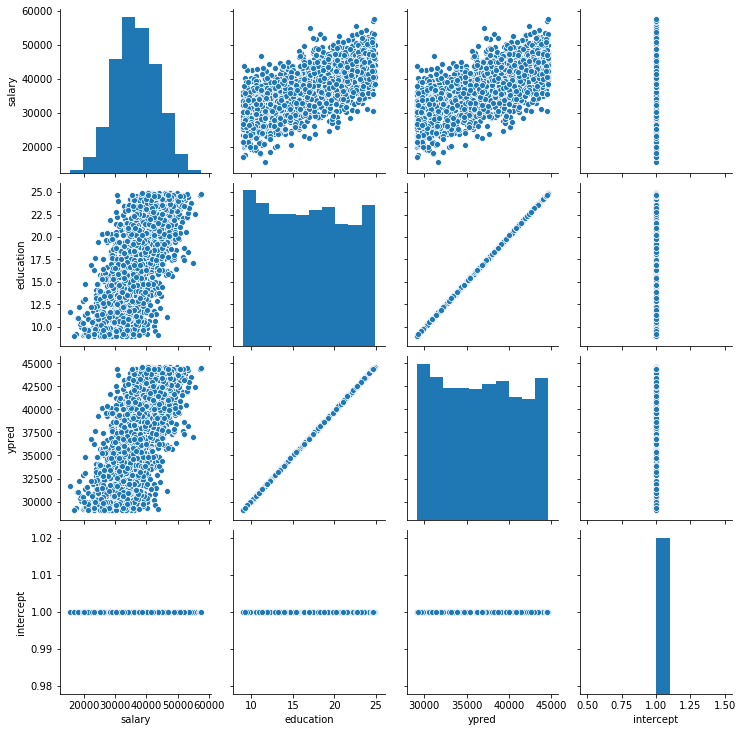

In [38]:
sns.pairplot(df)

### What if the Assumption seems to be violated?

The model will not yield good estimates. Look at an example, e.g. the case where the true relationship is

$annual\_sallary = w_0 + w_1 * years\_of\_education^3 + \epsilon$

In [40]:
df['salary_cubed'] = w_0 + w_1 * df['education']**3 + error
df.head()

,salary,education,ypred,intercept,salary_cubed
0,31863.903554,20.8,40637.914599,1,9.009976e+06
1,38846.873306,23.2,42980.178754,1,1.250281e+07
2,47749.014000,17.4,37319.707045,1,5.298373e+06
3,41031.492403,23.6,43370.556114,1,1.316169e+07
4,34158.545083,9.7,29804.942879,1,9.371315e+05


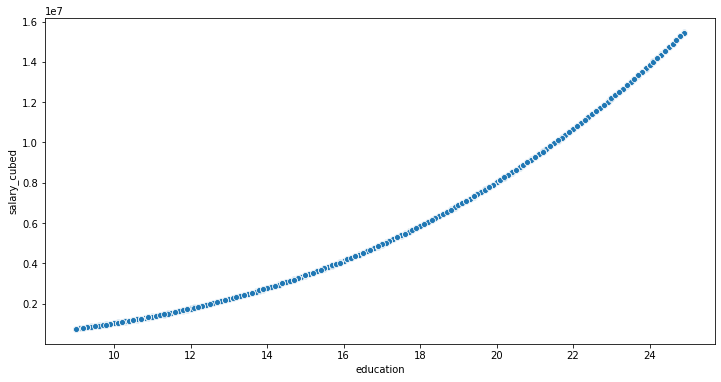

In [42]:
# PLot it
sns.scatterplot(x='education', y='salary_cubed', data=df)

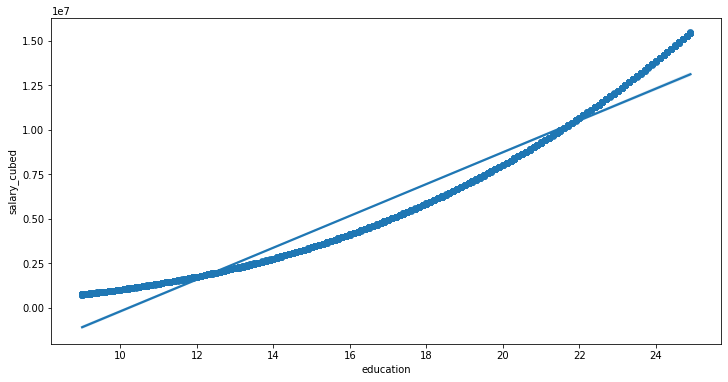

In [43]:
sns.regplot(x='education', y='salary_cubed', data=df)

### What can we do about it?

**Linearize the relationship** between X and y. How do we do that? That is the topic of the afternoon lecture.

## A2) Random sampling

It is hard to check for assumption A2. We need to have knowledge about the data collection process.

### When is the assumption violated?

### What can we do if the assumption is violated?

## A3)

It is easy to check for Assumption A3.

### What can we do if the assumption is violated?

## A4)

We can calculate the covariance between the residuals and the input features.

In [49]:
# Calculate the residuals
df['residuals'] = df['salary'] - df['ypred']

In [50]:
df[['education', 'residuals']].cov()

,education,residuals
education,2.208213e+01,2.212998e-12
residuals,2.212998e-12,2.502790e+07


In [45]:
# predict the model for the cubic relationship

m.fit(df[['education']], df['salary_cubed'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
df['ypred_cubed'] = m.predict(df[['education']])


In [47]:
df['residuals_cubed'] = df['salary_cubed'] - df['ypred_cubed']

In [48]:
df[['education', 'residuals_cubed']].cov()

,education,residuals_cubed
education,2.208213e+01,1.971241e+07
residuals_cubed,1.971241e+07,1.861594e+13


In order to find violations in A4 you can plot input features against the residuals. If there seems to be a pattern in the plot, then the assumption likely does not hold.


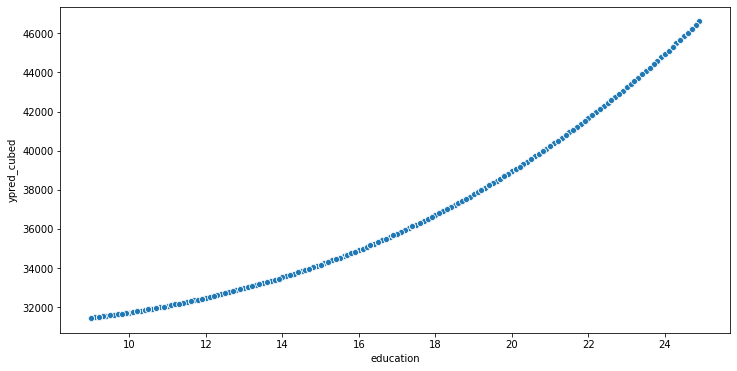

In [52]:
sns.scatterplot(x='education', y='ypred_cubed', data=df)

Is that enough?

We can plot the residuals against the input features.

### When is the assumption violated?

1. If the relationship between y and the input feature is not linear (like in the example)
- If there is Omitted Variable Bias

What is **Omitted Variable Bias**? Omitted Variable Bias exists if a feature that is able to explain the outcome variable and is correlated with another input variable is not included in the model. It might be excluded for two reasons:

- We do not have data on the variable
- We chose not to include it

If it is the latter we can solve the problem by just including the feature. If we do not have data on it we have to collect data on it.

Let's look at an example:

What if our actual model was not 

$annual\_sallary = w_0 + w_1 * years\_of\_education + \epsilon$

but 

$annual\_sallary = w_0 + w_1 * years\_of\_education + w_2 * iq + \epsilon$

In [55]:
# create values for the iq
df['iq'] = df['education'] + np.random.randint(80, 100, size=sample_size)
df.head()

,salary,education,ypred,intercept,salary_cubed,ypred_cubed,residuals_cubed,residuals,iq
0,31863.903554,20.8,40637.914599,1,9.009976e+06,39967.789490,8.970008e+06,-8774.011045,110.8
1,38846.873306,23.2,42980.178754,1,1.250281e+07,43561.420493,1.245925e+07,-4133.305448,118.2
2,47749.014000,17.4,37319.707045,1,5.298373e+06,36124.196937,5.262249e+06,10429.306955,115.4
3,41031.492403,23.6,43370.556114,1,1.316169e+07,44238.358139,1.311745e+07,-2339.063711,108.6
4,34158.545083,9.7,29804.942879,1,9.371315e+05,31637.277290,9.054943e+05,4353.602205,95.7


In [56]:
# What happens if we have omitted a Variable Bias?
# That means, we do not include iq in the model, although it actually belongs there

# True parameters are:
w_0 = 20_000
w_1 = 1_000
w_2 = 500

# The true relationship is the following:
df['salary_iq_model'] = w_0 + w_1 * df['education'] + w_2 * df['iq'] + error

In [59]:
# To simulate Omitted Variable Bias we fit a model just using education although iq has explanatory power

m_ovb = OLS(df['salary_iq_model'], df[['education', 'intercept']])
result_ovb = m_ovb.fit()
result_ovb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        salary_iq_model   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2893.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:33:04   Log-Likelihood:                -20169.
No. Observations:                2000   AIC:                         4.034e+04
Df Residuals:                    1998   BIC:                         4.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
education   1485.3300     27.616     53.785      0.000    1431.171    1539.489
intercept   6.487e+04    480.749    134.935      0.000    6.39e+04    6.58e+04
==============================================================================
Omnibus:                        2.002   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.923
Skew:                          -0.023   Prob(JB):                        0.382
Kurtosis:                       2.855   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
df[['education', 'iq']].corr()

,education,iq
education,1.000000,0.634018
iq,0.634018,1.000000


We can only detect this Omitted Variable Bias by fitting the model with and without iq and observing the regression table.

# Further assumptions

We learned under which assumptions the linear regression coefficients are unbiased. Are there more assumptions of interest?

## A5) Homoskedasticity

Homoskedasticity means that the variance of the y does not change over time. To understand Homoskedasticity better, let's have a look at its opposite - Heteroskedasticity.

We go back to our base model

$annual\_sallary = w_0 + w_1 * years\_of\_education + \epsilon$

but we let the variance increase with the year of education.

In [61]:
# Build a scaler for the error term
# MinMaxScaling

scaled_years_of_education = df['education'] - df['education'].min() /  df['education'].max() -  df['education'].min()

In [64]:
# calculate heteroskedastic_errors
df['het_errors'] = error * scaled_years_of_education
df.head()

,salary,education,ypred,intercept,salary_cubed,ypred_cubed,residuals_cubed,residuals,iq,salary_iq_model,het_errors
0,31863.903554,20.8,40637.914599,1,9.009976e+06,39967.789490,8.970008e+06,-8774.011045,110.8,87263.903554,-102216.023690
1,38846.873306,23.2,42980.178754,1,1.250281e+07,43561.420493,1.245925e+07,-4133.305448,118.2,97946.873306,-60240.979767
2,47749.014000,17.4,37319.707045,1,5.298373e+06,36124.196937,5.262249e+06,10429.306955,115.4,105449.014000,83191.110127
3,41031.492403,23.6,43370.556114,1,1.316169e+07,44238.358139,1.311745e+07,-2339.063711,108.6,95331.492403,-36571.834676
4,34158.545083,9.7,29804.942879,1,9.371315e+05,31637.277290,9.054943e+05,4353.602205,95.7,82008.545083,1509.459239


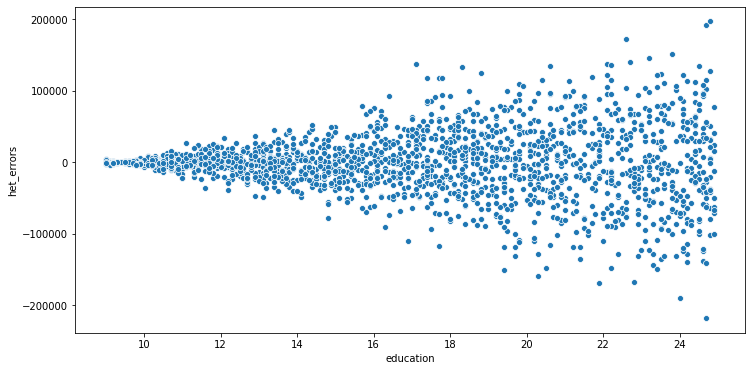

In [65]:
sns.scatterplot(x='education', y='het_errors', data=df)

In [120]:
# calculate heteroskedastic_salary

#### How do you find out?

- You plot the residuals term against x
- You can use a statistical test (Breusch-Pagan Test)

What the Breusch-Pagan Test does intuitively:
1. Runs a linear regression of y on x
2. It calculates the residuals
3. It runs a linear regression fo the residuals on X $\hat{epsilon} =
- It uses the R^2 value to determine whether the explanatory variables are able to explain the residuals; if that is the case, then we have some kind of heteroska...

In [66]:
# plot the residuals against y

In [67]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [69]:
het_breuschpagan(df['het_errors'], df[['education']])
# the fourth value is important, it gives you the p-value
# The Null hypothesis is that there is no heteroska..
# In this case we reject the null hypothesis becasue the p-value is very small

(557.6867221436519, nan, 772.9359319371071, 4.254326698595664e-144)

## A6) Normal Distribution of the Error Terms

This assumption is convenient if we want to make precise statements about effect sizes (the w coefficients of the linear regression).

Let's look at statsmodels output again.

#### How can we test for this assumption?

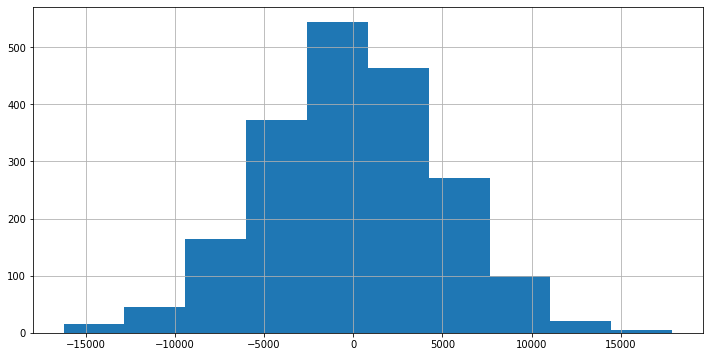

In [70]:
# Look at a histogram of the residuals
df['residuals'].hist()

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([-16235.63949625, -14812.78203265, -14442.83694247, ...,
          15014.39071531,  15472.23589299,  17889.14708099])),
 (5008.300258501908, 5.277848957547674e-12, 0.9998410818062721))

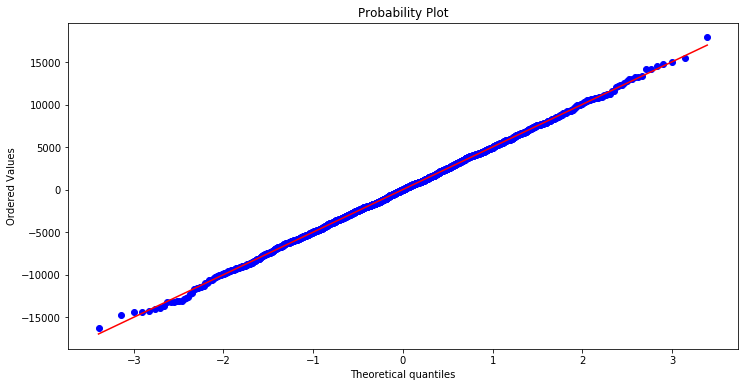

In [72]:
# Look at the QQ-plot
from scipy.stats import probplot
probplot(df['residuals'], plot=plt)

In [73]:
# Jarque-Bera-Test
from scipy.stats import jarque_bera
# looks at skewness and curtosis
jarque_bera(df['residuals'])
# second value is the p-value
# In this case, we fail to reject the null hypothesis
# So we can confidently say that the residuals are probably normally distributed

(0.023390845831975978, 0.9883727026980053)

What if normality fail to hold?

If the sample size is big, then this is not a problem. We can use the Central Limit Theorem and still apply the statistical evaluation.

If the sample size is small, we cannot really make a statements about effect sizes.

What is big?
In social sience it is often assumed that a big sample is a sample with more than 30 observations.


## A7) No Multicolinearity

If this assumption fails, we still don't have any problems to make predictions. Statements about the coefficients become very difficult if we have multicolinearity.

What is Multicolinearity?<br>
Two features are perfectly colinear, if one is a linear transformation of the other. For example height in cm and height in m would be perfectly colinear.

There will always be correlation between different variables. So when do we consider it to be a problem.

#### How do we check for colinearity?

In [77]:
df.head()

,salary,education,ypred,intercept,salary_cubed,ypred_cubed,residuals_cubed,residuals,iq,salary_iq_model,het_errors
0,31863.903554,20.8,40637.914599,1,9.009976e+06,39967.789490,8.970008e+06,-8774.011045,110.8,87263.903554,-102216.023690
1,38846.873306,23.2,42980.178754,1,1.250281e+07,43561.420493,1.245925e+07,-4133.305448,118.2,97946.873306,-60240.979767
2,47749.014000,17.4,37319.707045,1,5.298373e+06,36124.196937,5.262249e+06,10429.306955,115.4,105449.014000,83191.110127
3,41031.492403,23.6,43370.556114,1,1.316169e+07,44238.358139,1.311745e+07,-2339.063711,108.6,95331.492403,-36571.834676
4,34158.545083,9.7,29804.942879,1,9.371315e+05,31637.277290,9.054943e+05,4353.602205,95.7,82008.545083,1509.459239


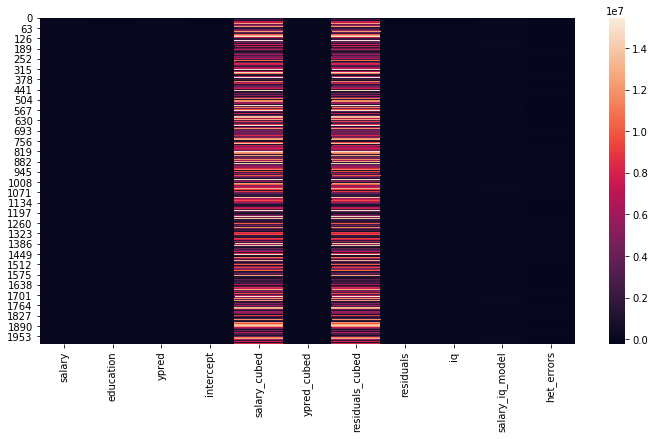

In [80]:
# Look at the correlations
sns.heatmap(df)

In [76]:
# Calculate Variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
variance_inflation_factor()